In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Load movies dataset

In [2]:
# Replace 'input_file_path' with the path to your input file.
input_file_path = "D:\Download\Movielens\movies.dat"

In [3]:
# Replace 'output_file_path' with the desired path for the output .csv file.
output_file_path = "movies.csv"

In [4]:
# Read the .dat file into a DataFrame using a specific encoding.
movies_data = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

In [5]:
# Write the DataFrame to a .csv file.
movies_data.to_csv(output_file_path, index=False)
movies_data.head(20)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
# Giving attribute names
movies_data.columns = ['Movie_Id','Movie_Title','Genre']
movies_data.dropna(inplace=True)
movies_data.head(10)

,Movie_Id,Movie_Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
movies_data.tail(10)

,Movie_Id,Movie_Title,Genre
3873,3943,Bamboozled (2000),Comedy
3874,3944,Bootmen (2000),Comedy|Drama
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's
3876,3946,Get Carter (2000),Action|Drama|Thriller
3877,3947,Get Carter (1971),Thriller
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [8]:
movies_data.shape

(3883, 3)

In [9]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_Id     3883 non-null   int64 
 1   Movie_Title  3883 non-null   object
 2   Genre        3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
# Checking missing values
movies_data.isnull().sum()

Movie_Id       0
Movie_Title    0
Genre          0
dtype: int64

# Load ratings dataset

In [11]:
# Replace 'input_file_path' with the path to your input file.
input_file_path = r"D:\Download\Movielens\ratings.dat"

In [12]:
# Replace 'output_file_path' with the desired path for the output .csv file.
output_file_path = "ratings.csv"

In [13]:
# Read the .dat file into a DataFrame using a specific encoding.
ratings_data = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

In [14]:
# Write the DataFrame to a .csv file.
ratings_data.to_csv(output_file_path, index=False)
ratings_data.head(20)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [15]:
# Giving attribute names
ratings_data.columns = ['Id', 'Movie_Id', 'Rating','Timestamp']
ratings_data.dropna(inplace=True)
ratings_data.head(10)

,Id,Movie_Id,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [16]:
ratings_data.tail(10)

,Id,Movie_Id,Rating,Timestamp
1000199,6040,2022,5,956716207
1000200,6040,2028,5,956704519
1000201,6040,1080,4,957717322
1000202,6040,1089,4,956704996
1000203,6040,1090,3,956715518
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [17]:
ratings_data.shape

(1000209, 4)

In [18]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   Id         1000209 non-null  int64
 1   Movie_Id   1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [19]:
# Check missing values
ratings_data.isnull().sum()

Id           0
Movie_Id     0
Rating       0
Timestamp    0
dtype: int64

# Load users dataset

In [21]:
# Replace 'input_file_path' with the path to your input file.
input_file_path = r"D:\Download\Movielens\users.dat"

In [22]:
# Replace 'output_file_path' with the desired path for the output .csv file.
output_file_path = "users.csv"

In [23]:
# Read the .dat file into a DataFrame using a specific encoding.
users_data = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

In [24]:
# Write the DataFrame to a .csv file.
users_data.to_csv(output_file_path, index=False)
users_data.head(20)

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [25]:
# Giving attribute names
users_data.columns = ['User_Id','Gender','Age','Occupation','Zip-code']
users_data.dropna(inplace=True)
users_data.head(10)

,User_Id,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [26]:
users_data.tail(10)

,User_Id,Gender,Age,Occupation,Zip-code
6030,6031,F,18,0,45123
6031,6032,M,45,7,55108
6032,6033,M,50,13,78232
6033,6034,M,25,14,94117
6034,6035,F,25,1,78734
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [27]:
# Changing string values to integer
users_data['Gender'].replace({'M':0, 'F':1}, inplace = True)
users_data

,User_Id,Gender,Age,Occupation,Zip-code
0,1,1,1,10,48067
1,2,0,56,16,70072
2,3,0,25,15,55117
3,4,0,45,7,02460
4,5,0,25,20,55455
...,...,...,...,...,...
6035,6036,1,25,15,32603
6036,6037,1,45,1,76006
6037,6038,1,56,1,14706
6038,6039,1,45,0,01060


In [28]:
users_data

,User_Id,Gender,Age,Occupation,Zip-code
0,1,1,1,10,48067
1,2,0,56,16,70072
2,3,0,25,15,55117
3,4,0,45,7,02460
4,5,0,25,20,55455
...,...,...,...,...,...
6035,6036,1,25,15,32603
6036,6037,1,45,1,76006
6037,6038,1,56,1,14706
6038,6039,1,45,0,01060


In [29]:
users_data.shape

(6040, 5)

In [30]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_Id     6040 non-null   int64 
 1   Gender      6040 non-null   int64 
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(4), object(1)
memory usage: 236.1+ KB


In [31]:
# Checking missing values
users_data.isnull().sum()

User_Id       0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

# Finding relation between datasets

In [32]:
# Distinct values of MovieIds
unique_counts = ratings_data['Movie_Id'].nunique()
print('Movie_Id:',unique_counts)

Movie_Id: 3706


In [33]:
# Min values of MovieIds
min_rating = ratings_data['Movie_Id'].min()
print("'{}':{}".format('Movie_Id',min_rating))

'Movie_Id':1


In [34]:
# Max values of MovieIds
max_rating = ratings_data['Movie_Id'].max()
print("'{}':{}".format('Movie_Id',max_rating))

'Movie_Id':3952


In [35]:
# Distinct values of Ids
unique_counts_ids = ratings_data['Id'].nunique()
print('Id:',unique_counts_ids)

Id: 6040


In [36]:
# Min values of Ids
min_rating_id = ratings_data['Id'].min()
print("'{}':{}".format('Id',min_rating))

'Id':1


In [37]:
# Max values of Ids
max_rating_id = ratings_data['Id'].max()
print("'{}':{}".format('Id',max_rating_id))

'Id':6040


# Merging of datasets

In [38]:
# Merge 'movies', 'ratings' and 'users' dataframe on the basis of common columns
merged_data = pd.merge(ratings_data, users_data, left_on='Id', right_on='User_Id')
merged_data = pd.merge(ratings_data, movies_data, on='Movie_Id')

merged_data.head()

,Id,Movie_Id,Rating,Timestamp,Movie_Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [39]:
merged_data.shape

(1000209, 6)

In [40]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Id           1000209 non-null  int64 
 1   Movie_Id     1000209 non-null  int64 
 2   Rating       1000209 non-null  int64 
 3   Timestamp    1000209 non-null  int64 
 4   Movie_Title  1000209 non-null  object
 5   Genre        1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 45.8+ MB


In [41]:
merged_data.head(10)

,Id,Movie_Id,Rating,Timestamp,Movie_Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama


In [42]:
merged_data.tail(10)

,Id,Movie_Id,Rating,Timestamp,Movie_Title,Genre
1000199,5334,3382,5,960796159,Song of Freedom (1936),Drama
1000200,5420,1843,3,960156505,Slappy and the Stinkers (1998),Children's|Comedy
1000201,5433,286,3,960240881,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
1000202,5494,3530,4,959816296,Smoking/No Smoking (1993),Comedy
1000203,5556,2198,3,959445515,Modulations (1998),Documentary
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [43]:
# Checking missing values
merged_data.isnull().sum()

Id             0
Movie_Id       0
Rating         0
Timestamp      0
Movie_Title    0
Genre          0
dtype: int64

In [44]:
# To calculate count of users using MovieId and Rating
rating_counts = merged_data.groupby(['Movie_Id','Rating']).size().reset_index(name = 'UserCount')

In [45]:
# To get movies which has more ratings than 100
filter_data = rating_counts[rating_counts['UserCount']>=100]

In [46]:
filter_data = pd.merge(filter_data,merged_data[['Movie_Id','Rating','Genre']])
filter_data

,Movie_Id,Rating,UserCount,Genre
0,1,3,345,Animation|Children's|Comedy
1,1,3,345,Animation|Children's|Comedy
2,1,3,345,Animation|Children's|Comedy
3,1,3,345,Animation|Children's|Comedy
4,1,3,345,Animation|Children's|Comedy
...,...,...,...,...
674616,3952,4,181,Drama|Thriller
674617,3952,4,181,Drama|Thriller
674618,3952,4,181,Drama|Thriller
674619,3952,4,181,Drama|Thriller


In [47]:
filter_data.shape

(674621, 4)

In [48]:
# After combining all the datasets
data = pd.concat([movies_data, ratings_data, users_data], axis=1)
data.head(20)

,Movie_Id,Movie_Title,Genre,Id,Movie_Id,Rating,Timestamp,User_Id,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,1.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,0.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,0.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,0.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,0.0,25.0,20.0,55455
5,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,1.0,50.0,9.0,55117
6,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,0.0,35.0,1.0,06810
7,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,0.0,25.0,12.0,11413
8,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,0.0,25.0,17.0,61614
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,1.0,35.0,1.0,95370


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Movie_Id     3883 non-null     float64
 1   Movie_Title  3883 non-null     object 
 2   Genre        3883 non-null     object 
 3   Id           1000209 non-null  int64  
 4   Movie_Id     1000209 non-null  int64  
 5   Rating       1000209 non-null  int64  
 6   Timestamp    1000209 non-null  int64  
 7   User_Id      6040 non-null     float64
 8   Gender       6040 non-null     float64
 9   Age          6040 non-null     float64
 10  Occupation   6040 non-null     float64
 11  Zip-code     6040 non-null     object 
dtypes: float64(5), int64(4), object(3)
memory usage: 91.6+ MB


# Data Visualization

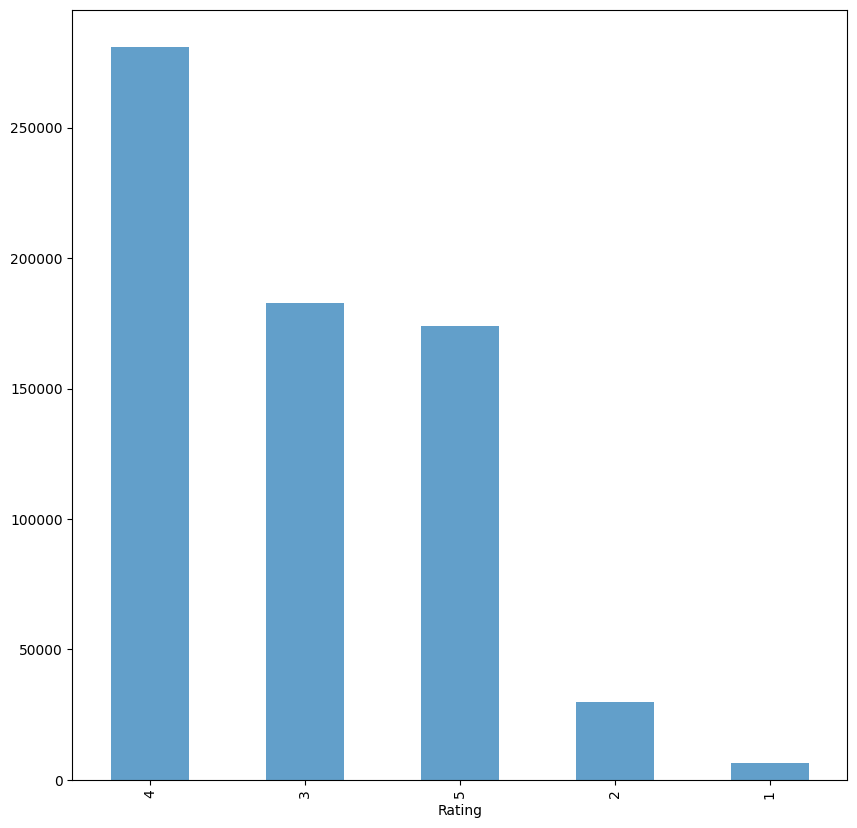

In [50]:
# To visualize overall ratingby users
filter_data['Rating'].value_counts().plot(kind='bar',alpha = 0.7,figsize=(10, 10))
plt.show()

Text(0.5, 0, 'age')

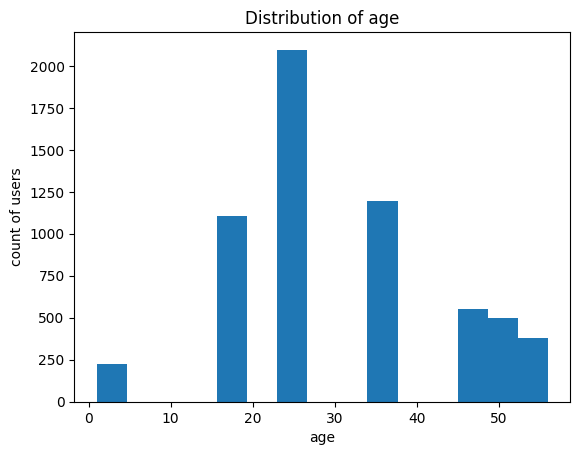

In [51]:
# Create histogram for combined datasets
data.Age.plot.hist(bins = 15)
plt.title('Distribution of age')
plt.ylabel('count of users')
plt.xlabel('age')

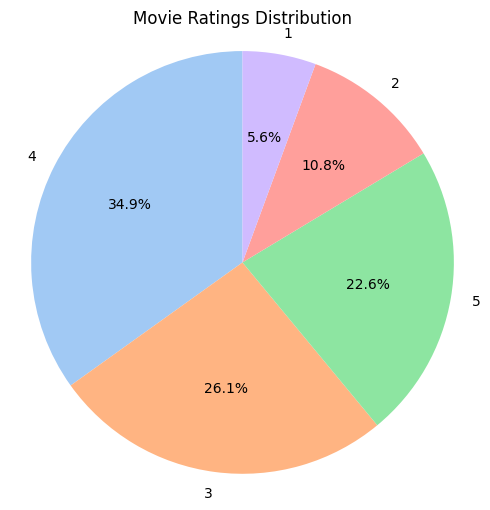

In [52]:
# Count the occurrences of each rating
ratings_counts = ratings_data['Rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(ratings_counts, labels=ratings_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Movie Ratings Distribution')
plt.axis('equal')
plt.show()

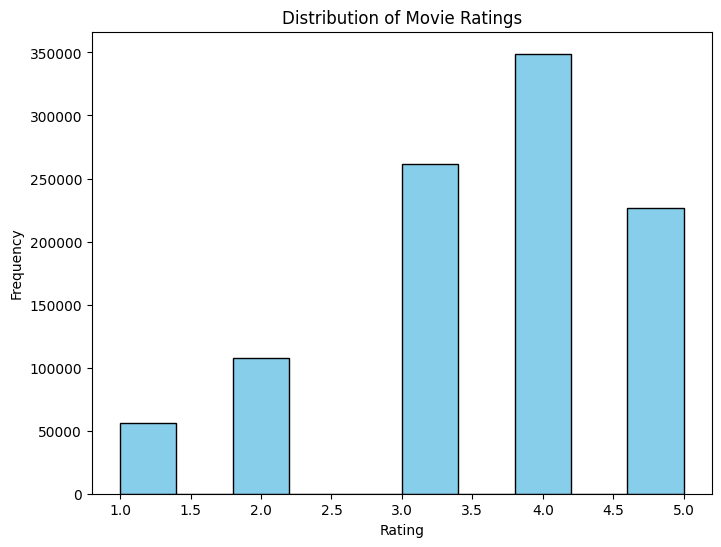

In [53]:
# Histogram for movie ratings
plt.figure(figsize=(8, 6))
plt.hist(ratings_data['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

# Building a model

In [54]:
first_700 = filter_data[700:]
first_700.dropna(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8608\2784396528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_700.dropna(inplace=True)


In [56]:
# Splitting of data into training and testing set
x = first_700.drop(['Genre'],axis=1)
y = first_700['Rating']

In [57]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [59]:
print(x.shape, x_train.shape, x_test.shape)

(673921, 3) (539136, 3) (134785, 3)


# Model training

In [60]:
model = LogisticRegression()

In [61]:
x_encoded = pd.get_dummies(x)

In [62]:
model.fit(x_train, y_train)

D:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [63]:
# Mean Squared Error
y_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error:',mse)

Mean Squared Error: 0.8043402455762881


In [64]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 0.896850180117219


In [65]:
# Training accuracy
log = round(model.score(x_train, y_train) * 100, 2)
print(log)

50.12


In [66]:
# Testing accuracy
log = round(model.score(x_test, y_test) * 100, 2)
print(log)

50.15
